# Loan Data from Prosper
## by James Case

This Data Analysis was conducted as a project for a Udacity Nanodegree.

## Table of Contents

#### Data Wrangling

[Gather Data](#Gather-Data)

[Asses Data](#Asses-Data)
- [Data Issues](#Data-Issues)

[Clean Data](#Clean-Data)

#### Exploratory Data Analysis

[Univariate Exploration](#Univariate-Exploration)

[Bivariate Exploration](#Bivariate-Exploration)

[Multivariate Exploration](#Multivariate-Exploration)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

sns.set()
%matplotlib inline

## Gather Data
Data was downloaded programtically from Udacity

[Back to TOC](#Table-of-Contents)

In [2]:
url = 'https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv'
r = requests.get(url)

In [3]:
if not os.path.exists('LoanData.csv'):
    with open('LoanData.csv','wb') as file:
        file.write(r.content)
    file.closed
else:
    print("The file exists")

The file exists


In [4]:
df = pd.read_csv('LoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
#df.info()
df[df['IncomeRange']=='$0']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
78,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157000000,A,36,Chargedoff,2009-04-09 00:00:00,0.18454,0.1700,0.1600,...,-15.66,0.0,4381.62,4381.62,0.0,1.0,0,0,0.0,115
108,10C034203841683992703F1,321000,2008-04-29 08:26:00.340000000,C,36,Completed,2011-03-17 00:00:00,0.28320,0.2600,0.2500,...,-242.09,0.0,0.00,0.00,0.0,1.0,0,0,0.0,53
772,3D743417918330010E59A92,306381,2008-04-08 16:19:26.823000000,AA,36,Completed,2010-12-15 00:00:00,0.10491,0.0980,0.0980,...,0.00,0.0,0.00,0.00,0.0,1.0,0,0,0.0,147
954,0ABC34181991286271447F8,309066,2008-04-12 17:49:28.630000000,C,36,Completed,2010-02-24 00:00:00,0.27767,0.2700,0.2600,...,-108.94,0.0,0.00,0.00,0.0,1.0,0,0,0.0,116
1346,0BD434071469643681BED58,249339,2007-12-11 22:50:45.560000000,HR,36,Completed,2008-08-15 00:00:00,0.37036,0.3500,0.3400,...,-6.04,0.0,0.00,0.00,0.0,1.0,0,0,0.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113485,DA153422134287105784C7D,341388,2008-05-29 19:20:20.503000000,B,36,Completed,2011-06-09 00:00:00,0.18756,0.1730,0.1630,...,-100.26,0.0,0.00,0.00,0.0,1.0,0,0,0.0,135
113608,CA873521306712899AD8000,517677,2011-07-21 20:39:21.660000000,NaN,60,Chargedoff,2012-03-30 00:00:00,0.24252,0.2199,0.2099,...,-19.98,0.0,7776.74,7776.74,0.0,1.0,0,0,0.0,182
113686,FDD83406389901620745200,244319,2007-12-04 18:18:14.747000000,A,36,Completed,2008-09-24 00:00:00,0.21588,0.2085,0.1985,...,-106.36,0.0,0.00,0.00,0.0,1.0,0,1,50.0,260
113767,DE48341184370727282B3F4,269403,2008-01-22 07:15:09.207000000,HR,36,Chargedoff,2009-06-05 00:00:00,0.36945,0.3450,0.3350,...,-41.78,0.0,3969.04,3969.03,0.0,1.0,1,1,50.0,5


## Asses Data

Before identifying columns to Asses I wanted to understand what columns will be important. Doing some research I found what these sites said:

<b>Nerd Wallet | https://www.nerdwallet.com/article/finance/mortgage-lenders-credit-score-interest-rate</b>
- Credit Score (Higer is better)
- Debt-to-income ratio (Lower is better)
- Down paymemnt (Larger the better as less risk to the bank)
- Loan Term ("lenders assume that a shorter loan means the borrower's ability to pay is less likely to change over the life of the loan" - this could mean that a shorter term is better?)
- Collateral (lower interest rate, but lender can seize collateral if payments are not made)
- Liquid Assets
- Employment History

<b>The Ascent (Motley Fool) | https://www.fool.com/the-ascent/personal-loans/articles/7-factors-lenders-look-considering-your-loan-application/ </b>
- Credit Score
- Income
- Employment History
- Debt to income ratio
- Value of collateral
- Size of downpayment
- Liquid assets
- Loan Term

Alternatively, Machine Learning techniques could be used to select important categories and dimensionally reduce the data. 

I will select: CreditScoreRangeLower, CreditScoreRangeUpper, IncomeRange, DebtToIncomeRatio, EmploymentStatus,EmploymentStatusDuration, and Term as features to predict interest rate.   

[Back to TOC](#Table-of-Contents)

In [7]:
#creating a copy of the data to analyze
Loans = df.copy()
columns = ['ListingNumber', 'ListingCreationDate','BorrowerRate','CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'DebtToIncomeRatio', 'EmploymentStatus', 'EmploymentStatusDuration',  'Term'] 
Loans = Loans[columns]

In [8]:
Loans.head()

,ListingNumber,ListingCreationDate,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,Term
0,193129,2007-08-26 19:09:29.263000000,0.1580,640.0,659.0,"$25,000-49,999",0.17,Self-employed,2.0,36
1,1209647,2014-02-27 08:28:07.900000000,0.0920,680.0,699.0,"$50,000-74,999",0.18,Employed,44.0,36
2,81716,2007-01-05 15:00:47.090000000,0.2750,480.0,499.0,Not displayed,0.06,Not available,NaN,36
3,658116,2012-10-22 11:02:35.010000000,0.0974,800.0,819.0,"$25,000-49,999",0.15,Employed,113.0,36
4,909464,2013-09-14 18:38:39.097000000,0.2085,680.0,699.0,"$100,000+",0.26,Employed,44.0,36


In [9]:
Loans.describe()

,ListingNumber,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,EmploymentStatusDuration,Term
count,1.139370e+05,113937.000000,113346.000000,113346.000000,105383.000000,106312.000000,113937.000000
mean,6.278857e+05,0.192764,685.567731,704.567731,0.275947,96.071582,40.830248
std,3.280762e+05,0.074818,66.458275,66.458275,0.551759,94.480605,10.436212
min,4.000000e+00,0.000000,0.000000,19.000000,0.000000,0.000000,12.000000
25%,4.009190e+05,0.134000,660.000000,679.000000,0.140000,26.000000,36.000000
50%,6.005540e+05,0.184000,680.000000,699.000000,0.220000,67.000000,36.000000
75%,8.926340e+05,0.250000,720.000000,739.000000,0.320000,137.000000,36.000000
max,1.255725e+06,0.497500,880.000000,899.000000,10.010000,755.000000,60.000000


In [10]:
Loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingNumber             113937 non-null  int64  
 1   ListingCreationDate       113937 non-null  object 
 2   BorrowerRate              113937 non-null  float64
 3   CreditScoreRangeLower     113346 non-null  float64
 4   CreditScoreRangeUpper     113346 non-null  float64
 5   IncomeRange               113937 non-null  object 
 6   DebtToIncomeRatio         105383 non-null  float64
 7   EmploymentStatus          111682 non-null  object 
 8   EmploymentStatusDuration  106312 non-null  float64
 9   Term                      113937 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 8.7+ MB


In [11]:
#nans must be dropped as we cannot determine what is meant by these nans
Loans[Loans.DebtToIncomeRatio.isnull()]

,ListingNumber,ListingCreationDate,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,Term
40,1167746,2014-01-27 12:02:57.523000000,0.1725,680.0,699.0,"$100,000+",NaN,Self-employed,276.0,60
69,1162592,2014-01-25 12:07:54.537000000,0.1139,700.0,719.0,"$25,000-49,999",NaN,Self-employed,12.0,60
78,359657,2008-06-29 23:23:40.157000000,0.1700,720.0,739.0,$0,NaN,Full-time,68.0,36
100,704916,2013-01-25 11:48:26.040000000,0.3134,720.0,739.0,Not employed,NaN,Not employed,12.0,36
103,579737,2012-04-17 11:58:52.270000000,0.2287,680.0,699.0,"$50,000-74,999",NaN,Self-employed,29.0,36
...,...,...,...,...,...,...,...,...,...,...
113893,1170177,2014-01-30 08:18:26.497000000,0.0930,740.0,759.0,"$50,000-74,999",NaN,Self-employed,292.0,36
113894,438537,2009-12-15 18:50:46.193000000,0.0700,800.0,819.0,"$75,000-99,999",NaN,Full-time,4.0,36
113899,449436,2010-03-08 20:48:58.387000000,0.0920,760.0,779.0,"$50,000-74,999",NaN,Full-time,51.0,36
113903,1182559,2014-02-24 17:01:03.320000000,0.1605,700.0,719.0,"$25,000-49,999",NaN,Self-employed,9.0,60


In [12]:
Loans[Loans.EmploymentStatus.isnull()]

,ListingNumber,ListingCreationDate,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,Term
39,24135,2006-07-11 17:14:14.647000000,0.1450,680.0,699.0,Not displayed,0.06000,NaN,NaN,36
92,22591,2006-07-02 11:05:02.857000000,0.0755,820.0,839.0,Not displayed,0.08000,NaN,NaN,36
146,31745,2006-08-16 09:43:10.867000000,0.0925,740.0,759.0,Not displayed,0.07000,NaN,NaN,36
162,17578,2006-06-03 07:46:36.343000000,0.0780,760.0,779.0,Not displayed,0.13000,NaN,NaN,36
193,17091,2006-05-31 23:48:17.177000000,0.2300,540.0,559.0,Not displayed,0.20000,NaN,NaN,36
...,...,...,...,...,...,...,...,...,...,...
113663,21182,2006-06-22 12:04:17.483000000,0.2875,520.0,539.0,Not displayed,0.03000,NaN,NaN,36
113712,18121,2006-06-06 15:08:32.807000000,0.2375,500.0,519.0,Not displayed,0.12000,NaN,NaN,36
113902,3579,2006-03-26 00:11:04.620000000,0.0812,NaN,NaN,Not displayed,0.07419,NaN,NaN,36
113914,30223,2006-08-09 14:34:40.010000000,0.2500,520.0,539.0,Not displayed,0.05000,NaN,NaN,36


In [13]:
Loans[Loans['CreditScoreRangeUpper']<300]

,ListingNumber,ListingCreationDate,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,Term
794,97950,2007-02-11 13:40:55.490000000,0.2900,0.0,19.0,Not displayed,NaN,Not available,NaN,36
912,61512,2006-11-14 08:23:08.430000000,0.2600,0.0,19.0,Not displayed,0.03000,Not available,NaN,36
1685,94290,2007-02-06 15:50:46.723000000,0.1625,0.0,19.0,Not displayed,NaN,Not available,NaN,36
4290,7055,2006-04-23 14:19:41.030000000,0.2375,0.0,19.0,Not displayed,0.10368,NaN,NaN,36
4371,31236,2006-08-14 11:45:59.710000000,0.2325,0.0,19.0,Not displayed,NaN,Not available,NaN,36
...,...,...,...,...,...,...,...,...,...,...
109522,60886,2006-11-13 06:36:16.067000000,0.2000,0.0,19.0,Not displayed,NaN,Not available,NaN,36
109855,85920,2007-01-17 13:07:35.540000000,0.2190,0.0,19.0,Not displayed,0.06000,Not available,NaN,36
110290,97521,2007-02-10 21:22:12.553000000,0.1594,0.0,19.0,Not displayed,0.01000,Not available,NaN,36
111624,82404,2007-01-07 20:33:39.027000000,0.2900,0.0,19.0,Not displayed,NaN,Not available,NaN,36


In [14]:
Loans['Term'].unique()

array([36, 60, 12], dtype=int64)

In [15]:
Loans['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [16]:
Loans['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

### Data Issues

1) Quality Issues
- CreditScoreRangeLower, CreditScoreRangeUpper , DebtToIncomeRatio, EmploymentStatus, and EmploymentStatusDuration are not the full 113937 values and have NaNs
- Credit Scores less than 300, this seems to be a repeated clerical error as the upper score is typically 19 and the lower score 0
- Credit score would be more useful a a single value
- There are a number of columns with a Debt-to-income-ratio of NaN when they should most likely be 0
- Income Range should be a categorical value, and has some values 'Not Displayed'
- Term should be a categorical value
- Employment Status is NaN, Employment should also be a yes/no

2) Tidy Issues
- Listing number is a variable and not an index

[Back to TOC](#Table-of-Contents)

### What is the structure of your dataset?

> The structure of the dataframe

### What is/are the main feature(s) of interest in your dataset?

> CreditScoreRangeLower, CreditScoreRangeUpper, IncomeRange, DebtToIncomeRatio, EmploymentStatus,EmploymentStatusDuration,  Term, and BorrowerRate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe all the ones I have selected will assist me

## Clean Data
Here issues that were identified in the assessment will be reviewed and fixed. 

[Back to TOC](#Table-of-Contents)

In [17]:
#fills any empty employment duration fields with 0
Loans.EmploymentStatusDuration.fillna(0,inplace=True)
#drop all nans
Loans.dropna(axis=0, how='any',inplace=True)

In [18]:
#removes all Credit scores less than 300
cred_idx = Loans[Loans['CreditScoreRangeUpper']<300].index
for i in cred_idx:
    Loans.drop(index=i,inplace=True) 

In [19]:
#from here it appears the reason some credits were 0-19 is because that is the range of the upper and lower bounds 
#the other credit scores will remain removed since there is no way to reverse the process
(Loans['CreditScoreRangeUpper'] - Loans['CreditScoreRangeLower']).describe()

count    103100.0
mean         19.0
std           0.0
min          19.0
25%          19.0
50%          19.0
75%          19.0
max          19.0
dtype: float64

In [20]:
#Create a singular credit score
Loans['CreditScore'] = (Loans['CreditScoreRangeUpper'] + Loans['CreditScoreRangeLower'])/2

In [21]:
#State if they are comployed/unemployed
employed = ['Self-employed', 'Employed',  'Full-time',  'Part-time']
unemployed = ['Not available','Other','Not employed','Retired']

emp_idxs = {}
unemp_idxs = []

for i,idx in zip(Loans['EmploymentStatus'],Loans['EmploymentStatus'].index):
    if i in employed:
        emp_idxs[idx]='Employed'
    elif i in unemployed:
        emp_idxs[idx]='Unemployed'


In [22]:
new_employ = pd.DataFrame.from_dict(emp_idxs,orient='index',columns=['Employment'])
Loans = Loans.join(new_employ, how='outer')
Loans

,ListingNumber,ListingCreationDate,BorrowerRate,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,Term,CreditScore,Employment
0,193129,2007-08-26 19:09:29.263000000,0.1580,640.0,659.0,"$25,000-49,999",0.17,Self-employed,2.0,36,649.5,Employed
1,1209647,2014-02-27 08:28:07.900000000,0.0920,680.0,699.0,"$50,000-74,999",0.18,Employed,44.0,36,689.5,Employed
2,81716,2007-01-05 15:00:47.090000000,0.2750,480.0,499.0,Not displayed,0.06,Not available,0.0,36,489.5,Unemployed
3,658116,2012-10-22 11:02:35.010000000,0.0974,800.0,819.0,"$25,000-49,999",0.15,Employed,113.0,36,809.5,Employed
4,909464,2013-09-14 18:38:39.097000000,0.2085,680.0,699.0,"$100,000+",0.26,Employed,44.0,36,689.5,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
113932,753087,2013-04-14 05:55:02.663000000,0.1864,700.0,719.0,"$50,000-74,999",0.13,Employed,246.0,36,709.5,Employed
113933,537216,2011-11-03 20:42:55.333000000,0.1110,700.0,719.0,"$75,000-99,999",0.11,Employed,21.0,36,709.5,Employed
113934,1069178,2013-12-13 05:49:12.703000000,0.2150,700.0,719.0,"$25,000-49,999",0.51,Employed,84.0,60,709.5,Employed
113935,539056,2011-11-14 13:18:26.597000000,0.2605,680.0,699.0,"$25,000-49,999",0.48,Full-time,94.0,60,689.5,Employed


In [23]:
#there seems to be some outliers of people with very large employment status duration; 
#this is not wrong, but it is largely skewing the data
empstat_idx = Loans[Loans['EmploymentStatusDuration']>400].index
for i in empstat_idx:
    Loans.drop(index=i,inplace=True) 

In [24]:
#there also seems to be some outliers of people with debt-to-income-ratio greater than 1. I am unsure if this is an error
#or if the banks did give out loans with a higher debt-income-ratio
debt1_idx = Loans[Loans['DebtToIncomeRatio']>1].index
for i in debt1_idx:
    Loans.drop(index=i,inplace=True) 

## Univariate Exploration

In this section I investigate distributions of individual variables. I will explore the most interesting distributions further with Bivariate Exploration. A full description of the graphs and points of interest can be found below. 

[Back to TOC](#Table-of-Contents)

In [25]:
def graph_info(title,xlabel,ylabel):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

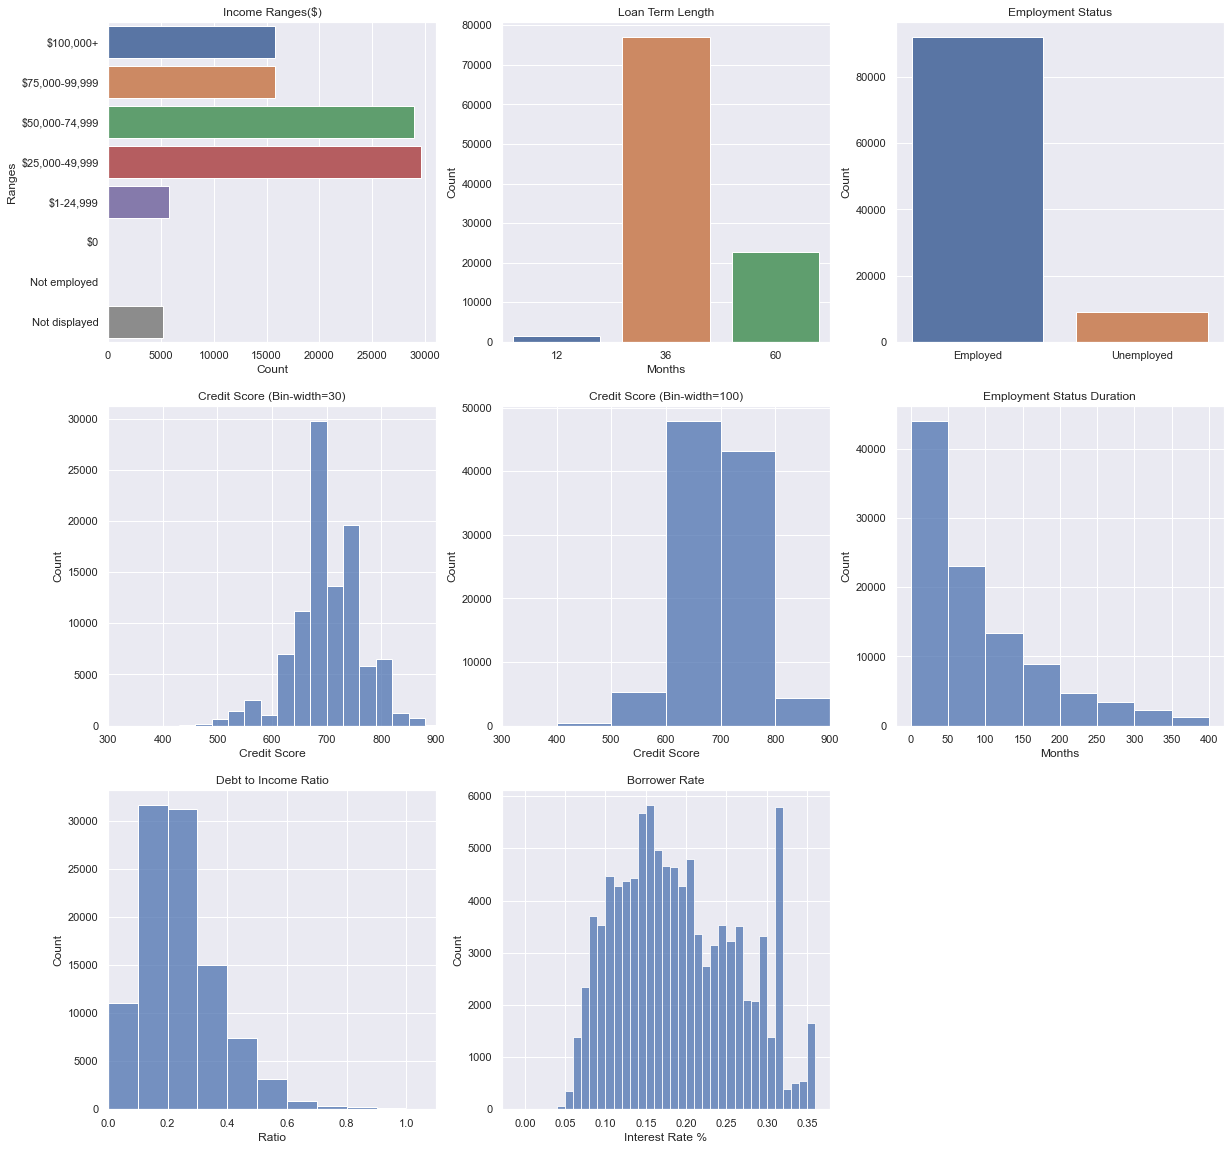

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
order_inc = ['$100,000+','$75,000-99,999', '$50,000-74,999','$25,000-49,999', '$1-24,999','$0', 'Not employed', 'Not displayed',]
sns.countplot(data=Loans,y='IncomeRange',order=order_inc)
graph_info('Income Ranges($)','Count','Ranges')

plt.subplot(3,3,2)
sns.countplot(data=Loans,x='Term');
graph_info('Loan Term Length', 'Months', 'Count')

plt.subplot(3,3,3)
sns.countplot(data=Loans,x='Employment');
graph_info('Employment Status', '', 'Count')

plt.subplot(3,3,4)
sns.histplot(Loans['CreditScore'],binwidth=30)
plt.xlim(300,900)
graph_info('Credit Score (Bin-width=30)','Credit Score','Count')

plt.subplot(3,3,5)
bins = np.arange(300,900+100,100)
sns.histplot(Loans.CreditScore,bins=bins)
plt.xlim(300,900);
graph_info('Credit Score (Bin-width=100)','Credit Score','Count')

plt.subplot(3,3,6)
bins = np.arange(0,450,50)
sns.histplot(Loans['EmploymentStatusDuration'],bins=bins);
graph_info('Employment Status Duration', 'Months','Count')

plt.subplot(3,3,7)
bins=np.arange(0,1.0+.1,.1)
sns.histplot(Loans['DebtToIncomeRatio'],bins=bins);
plt.xlim(0,1.1)
graph_info('Debt to Income Ratio','Ratio','Count')

plt.subplot(3,3,8)
bins = np.arange(-0.01,0.36+0.01,0.01)
sns.histplot(Loans.BorrowerRate,bins=bins);
graph_info('Borrower Rate','Interest Rate %','Count')

#### Income Ranges 
- It is interesting that the distribution is unimodal, peaking at 25,000 to 74,999. This may suggest those with a lower income apply or are given loans more often.
- Unfortunately most of the individuals who had an income of 0 had multiple NaN categories and had to be removed. Further steps in investigating this dataset would involve reaching back to Prosper and finding out why. 

#### Loan Term Length
- One common point I found in research was that loan companies would want to make their money back quickly so shorter loans would be desired. However, it appears there are not many 12 month loans and the majority belongs to 36 month loans. 

#### Employment Status
- The majority of loans are given to those who are employed which makes sense as companies would want to know that those they are loaning to will be able to pay them back. 

#### Credit Score
- It is interesting that there is a unimodal distribution centered around 670-700. This could suggest that those around this credit score are most likely to apply for a loan, or that the general population typically has a credit score near this range. 

#### Employment Status Duration
- One of the most interesting graphs to come out of this dataset. This graph is heavily right-skewed with the majority of people being in a position 50 months or less. However, this also indicates that people with long career durations may have a less likely need to apply for loans. This could be due to large amounts of money saved or simply no need to apply for loans because they took out loans earlier in their life. 

#### Debt To Income Ratio
- This graph largely shows that banks will loan money to individuals with a relatively low debt and avoid others with higher debt. There were a few outliers of individuals who had a ratio over 10, but they were removed. 

#### Borrower Rate
- Borrower Rate has a fairly uniform distribution peaking around .15, but there is also a noticeable peark around .30. 

## Bivariate Exploration

Here the variable that I am most interested in is what rate an individual got from Prosper based upon different paramters. Namely: Credit Score, Debt to Income Ratios, and Income Ranges. A full description of the plots can be found below.

[Back to TOC](#Table-of-Contents)

#### Borrower Rate v Credit Score

Credit scores are determined by credit reporting agencies and are somewhat of a track record of your credit usage and history. The median rate individuals received decreases drastically as credit score goes up. It is not surprising that this happens as banks are more likely to loan to someone who has a better record, as they want to be apid back. What I find more interesting is the spread in data for credit scores in the low 600s to 700s. Here we can see that in these ranges it may be harder to predict what rate you may get because the distribution is fairly spread out. The violin plot shows this extremely well how above 700 credit score individuals are more likely to be near the median. 

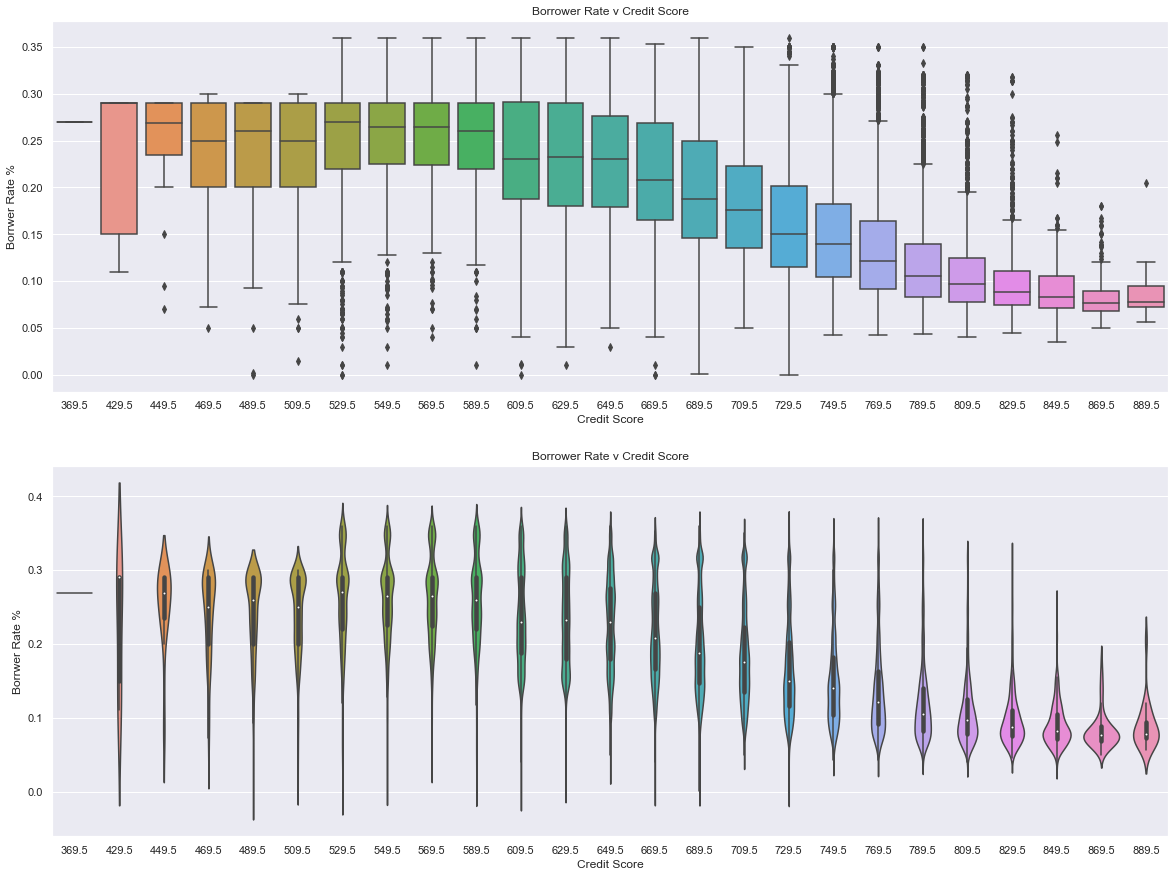

In [27]:
#Scatters
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(data=Loans,x='CreditScore',y='BorrowerRate' )
graph_info('Borrower Rate v Credit Score','Credit Score','Borrower Rate %')


plt.subplot(2,1,2)
sns.violinplot(data=Loans,x='CreditScore',y='BorrowerRate' );
graph_info('Borrower Rate v Credit Score','Credit Score','Borrower Rate %')

#### Borrower Rate v Debt to Income Ratio

The number of data points in this greatly affects the scatter plot and looks it extremely messy. The first set of scatter and kde plots only contain 10000 points, but it looks incomprehensible. In the second set of graphs only 1000 points were used and the fidelity of the graphs is not left. 

The most interesting feature is in the kde plot where the majority of points are at a debt to income ratio of 0.2 resulting in a rate of 0.15. This is not clear in the scatter plot as their does not appear to be a relationship between the two. However, using the kde plot it would be ok to state that a majority of individuals that have a debt to income ratio close to 0.2 then it would be likely to have a rate of 0.15.

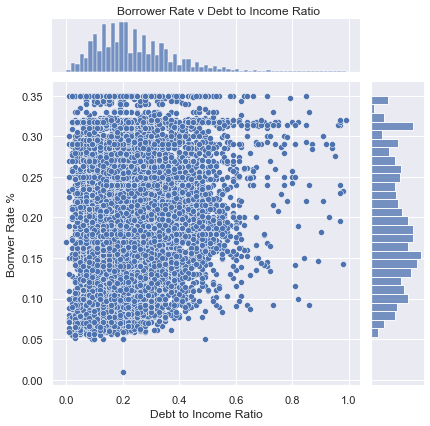

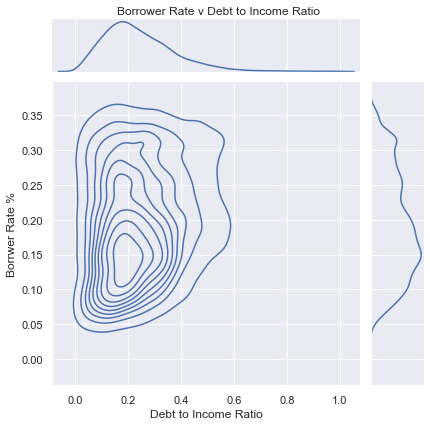

In [28]:
Loans_LargeSamp = Loans.sample(10000)

g1 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_LargeSamp,kind='scatter')
g1.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio')

g2 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_LargeSamp,kind='kde');
g2.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio');

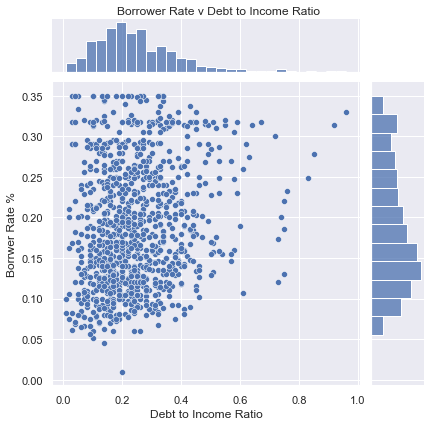

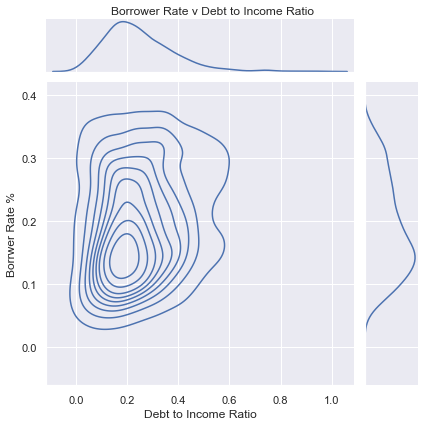

In [29]:
Loans_Samp = Loans.sample(1000)

g1 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_Samp,kind='scatter')
g1.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio')

g2 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_Samp,kind='kde');
g2.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio');

#### Borrower Rate v Income Ranges

The box plots below are showing that as income range decreases the median rate increases. This is interesting as it suggests those that have more money have an easier time finding loans. This is logical as banks will want to recoup their money faster and those with more moeny may be more likely to pay it back faster. However, it does not help those who have  a lower income and may be more in need of a loan. 

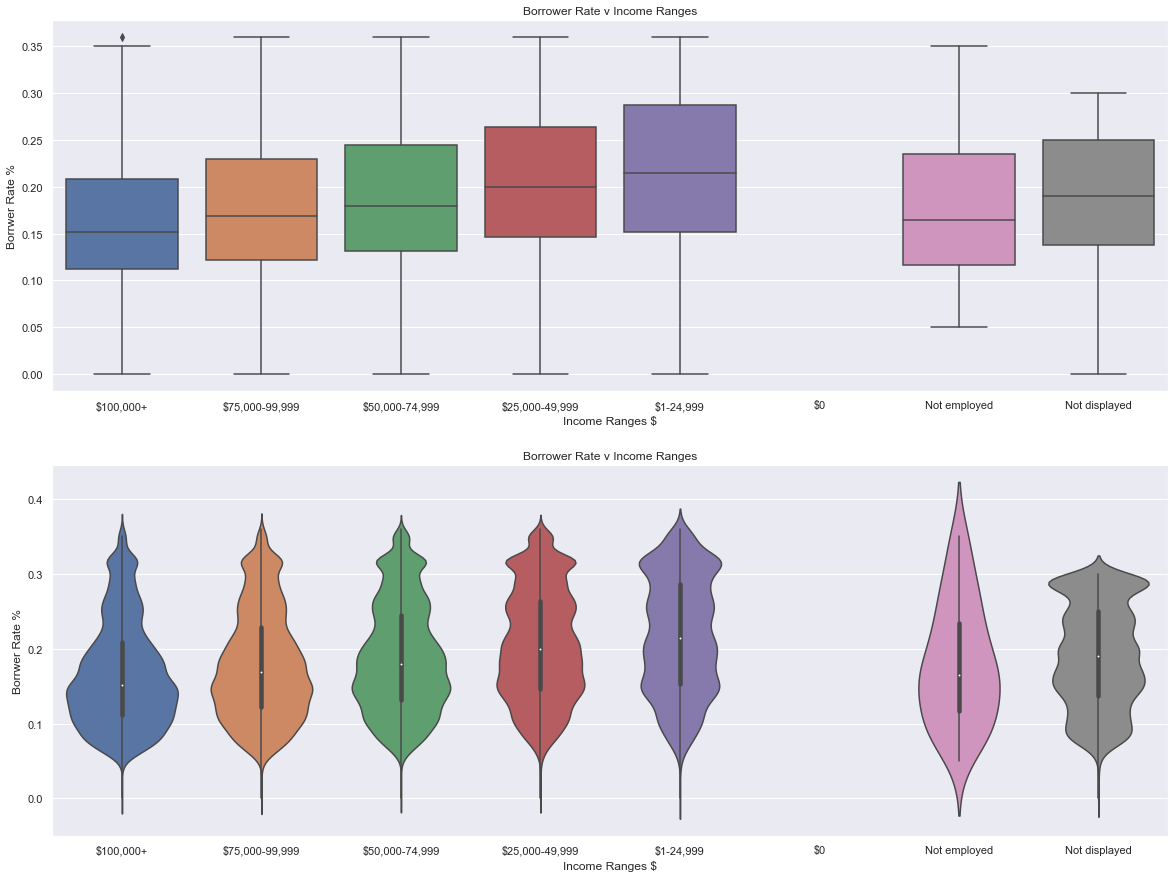

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(data=Loans,x='IncomeRange',y='BorrowerRate',order=order_inc )
plt.ylabel('Borrwer Rate %')
plt.title('Borrower Rate v Income Ranges')
plt.xlabel('Income Ranges $')

plt.subplot(2,1,2)
sns.violinplot(data=Loans,x='IncomeRange',y='BorrowerRate', order=order_inc );
plt.ylabel('Borrwer Rate %')
plt.title('Borrower Rate v Income Ranges')
plt.xlabel('Income Ranges $');

## Multivariate Exploration

Here I am most interested in how other variables affect the relationship between an individual's debt to income ratio and their loan rate. 

[Back to TOC](#Table-of-Contents)

#### Employments Affect on Borrower Rate 

To begin with the data was havily skewed in banks providing people with loans who were employed rather than being unemployed. Despite this, it is interesting to note that in the kde plot the unemployed individuals are still getting around the same rates as employed people with the same debt to income ratio.

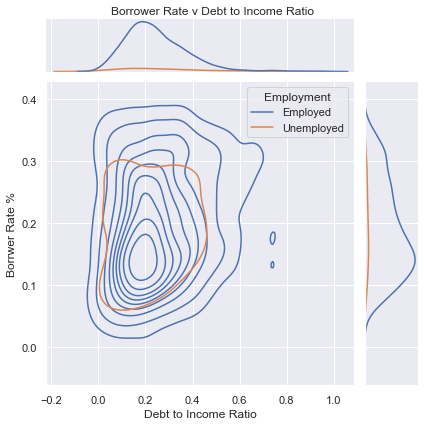

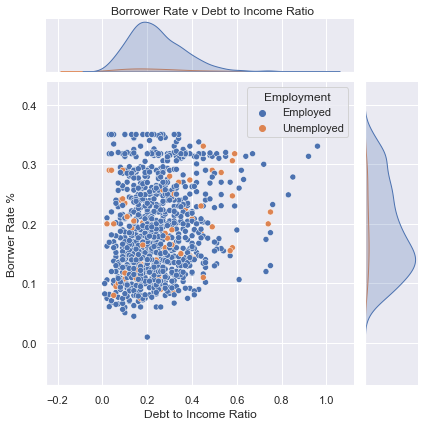

In [31]:
g5 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_Samp,kind='kde',hue='Employment');
g5.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio');

g6 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_Samp,kind='scatter',hue='Employment');
g6.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio');

#### Loan Term Length Affect on Borrower Rate

In the below kde plot the 12 month loan is not represented because there was not enough data points for it. However, looking at the scatter plot I find it surprising that many of those who got a 12 month loan had such low rates. Many resources have suggested that the shorter the term the historically worse rates you will get. There is not enough data to support this surprising conclusion, but it is worth noting. 

In addition to the surpising conclusion from above, I thought that it was strange that the 60 month loan rates were not significantly lower than that of the 36 month loans. While in the kde plot we can see that the overall spread of the borrower rate for 36 month is smaller than that of the 60 month loans, it is strange to see that the majority of loan rates  for 36 month loans are lower than that of 60 month loans. 

C:\Users\jmcas\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


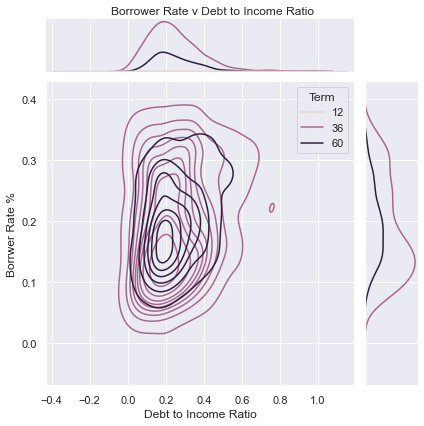

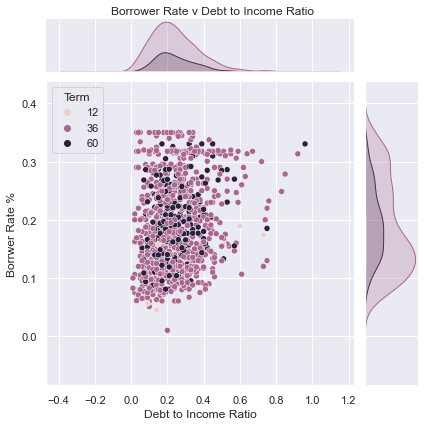

In [32]:
g7 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_Samp,kind='kde',hue='Term');
g7.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio');

g8 = sns.jointplot(x='DebtToIncomeRatio',y='BorrowerRate',data=Loans_Samp,kind='scatter',hue='Term');
g8.set_axis_labels('Debt to Income Ratio', 'Borrwer Rate %')
plt.subplots_adjust(top=.95)
plt.suptitle('Borrower Rate v Debt to Income Ratio');